# PCA for our data

In [26]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
import collections

In [27]:
#Daten einlesen
df = pd.read_csv(
    filepath_or_buffer = "final_data_only_tpm.csv",
    sep=",",
)

df.head()

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,AC092910.4,AC073611.1,AC136977.1,AC078856.1,AC008763.4,AL592295.6,AC006486.3,AL391628.1,AP006621.6,cancer_type
0,19.7011,0.1125,46.1397,1.8913,0.2670,18.6466,4.3945,24.1591,6.7242,9.4371,...,0.0,0.0641,0.0,1.0888,0.0,3.1977,0.0,0.0104,0.3953,kidney chromophobe
1,31.6275,0.0000,45.5189,2.8743,0.4744,4.2348,1.4145,60.8153,15.4309,7.5267,...,0.0,0.0781,0.0,0.0000,0.0,15.4262,0.0,0.0042,0.4094,kidney chromophobe
2,35.9928,0.5207,108.0270,4.8134,0.8010,4.5446,3.2850,33.1630,13.1085,12.1888,...,0.0,0.1049,0.0,0.0000,0.0,13.2312,0.0,0.1154,0.3050,kidney chromophobe
3,18.2605,0.0921,27.5398,2.3258,0.3473,4.5023,1.5078,47.2006,10.6721,5.0657,...,0.0,0.1193,0.0,0.0000,0.0,6.4516,0.0,0.0141,0.1416,kidney chromophobe
4,68.8052,3.4134,88.0619,6.2415,1.2251,9.5310,30.6990,66.3841,12.9370,20.1289,...,0.0,0.1141,0.0,0.0000,0.0,21.8857,0.0,0.0394,0.3547,kidney chromophobe


In [28]:
#In Frautres und Klasse aufteilen
features = df.iloc[:, 0:-1].values
Class = df.iloc[:, -1].values



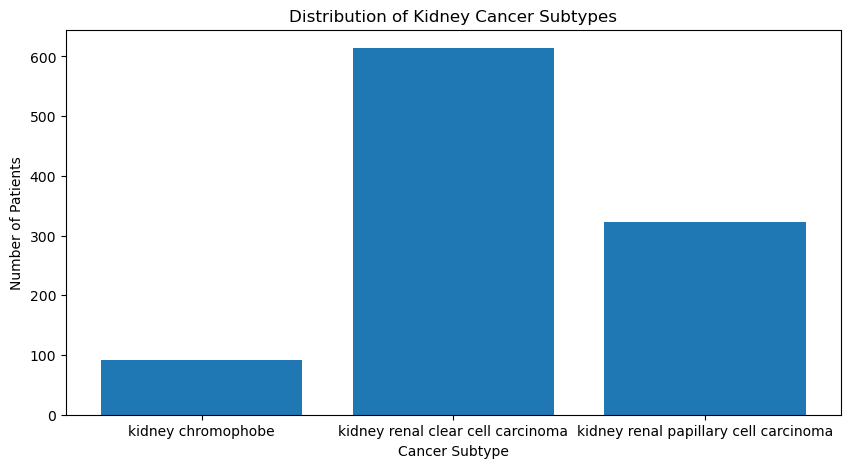

In [29]:
#Daten visualisieren

counter = collections.Counter(Class)
fig = plt.figure(figsize=(10, 5))
plt.bar(counter.keys(), counter.values())
plt.xlabel("Cancer Subtype")
plt.ylabel("Number of Patients")
plt.title("Distribution of Kidney Cancer Subtypes")
plt.show()

In [30]:
#Daten standardisieren
features_std = StandardScaler().fit_transform(X=features)

In [31]:
#Anwenden der PCA
pca = PCA(n_components=50)

principalComponents = pca.fit_transform(features_std)
pca.explained_variance_ratio_
print(pca.explained_variance_ratio_.sum())
principalDataframe = pd.DataFrame(data = principalComponents)


0.6664832889086498


In [32]:
# Klassenlabel wieder hinzufügen
targetDataframe = df[['cancer_type']]
newDataframe = pd.concat([principalDataframe, targetDataframe],axis = 1)
#erste spalte noch löschen
newDataframe.drop(newDataframe.columns[0], axis=1)

newDataframe.to_csv("data_after_pca.csv", sep=",")

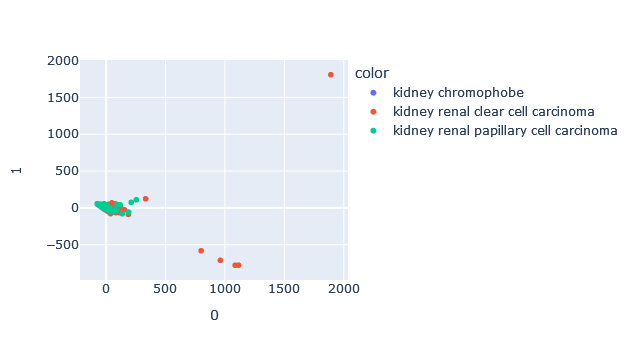

In [33]:
#Visualisierung
import plotly.express as px
from sklearn.manifold import TSNE
fig = px.scatter(principalComponents,x = 0, y=1, color=df['cancer_type'])
fig.show()


## Datenvisualisierung mit t-SNE-Plot


In [34]:
tsne = TSNE(n_components=2,init='random', perplexity=27, n_iter=10000, learning_rate=300, random_state = 0)
tsne_results = tsne.fit_transform(principalComponents)

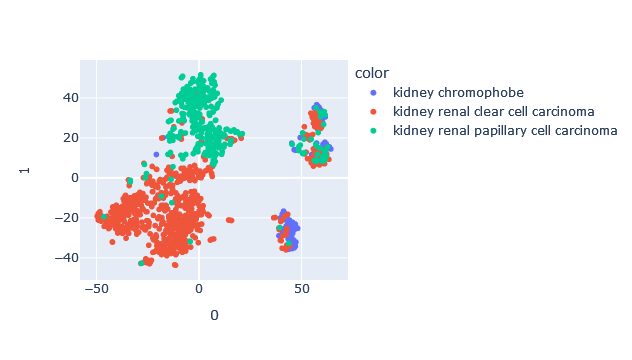

In [35]:
fig = px.scatter(tsne_results,x=0,y=1, color=df['cancer_type'])
fig.show()